In [4]:
import pandas as pd
centroids_df = pd.read_csv('stations_centroids.csv', sep=';', encoding='cp1250')

In [8]:
float_values = ['long', 'lat', 'lat_centroide', 'long_centroide']
for float_value in float_values:
    centroids_df[float_value] = centroids_df[float_value].apply(lambda x: float(x.replace(',', '.')))
centroids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
long              199 non-null float64
lat               199 non-null float64
nombre            199 non-null object
domicilio         199 non-null object
nro_est           199 non-null int64
dire_norm         199 non-null object
capacidad         199 non-null int64
cluster           199 non-null int64
lat_centroide     199 non-null float64
long_centroide    199 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 15.6+ KB


In [10]:
centroids_df.sort_values('cluster').head()

,long,lat,nombre,domicilio,nro_est,dire_norm,capacidad,cluster,lat_centroide,long_centroide
99,-58.442423,-34.589049,Fitz Roy,Fitz Roy 1092 y Loyola,101,1092 FITZ ROY,12,0,-34.589985,-58.44849
156,-58.445099,-34.592839,Villarroel,Villarroel y Humboldt,158,VILLARROEL y HUMBOLDT,12,0,-34.589985,-58.44849
125,-58.452927,-34.592212,Santos Dumont y Otero,Santos Dumont 4380 y Otero,127,4380 DUMONT SANTOS,10,0,-34.589985,-58.44849
102,-58.455062,-34.587548,Federico Lacroze,Av Corrientes 6800 y Federico Lacroze,104,6900 CORRIENTES AV,20,0,-34.589985,-58.44849
100,-58.445987,-34.586440,Roseti,Roseti 50 y Av Dorrego,102,50 ROSETI,12,0,-34.589985,-58.44849


In [19]:
def euclidean_distance(x):
    import numpy as np
    return np.sqrt((x['lat'] - x['lat_centroide']) ** 2 + (x['long'] - x['long_centroide']) ** 2)

centroids_df['euclidean_distance'] = centroids_df.apply(euclidean_distance, axis=1)
centroids_df.head()

,long,lat,nombre,domicilio,nro_est,dire_norm,capacidad,cluster,lat_centroide,long_centroide,euclidean_distance
0,-58.392452,-34.583133,Facultad de Derecho,Av. Pres.Figueroa Alcorta y Juan A.Bibiloni,1,"FIGUEROA ALCORTA, PRES. AV. y BIBILONI, JUAN A.",20,1,-34.588454,-58.393190,0.005372
1,-58.374822,-34.592589,Retiro,Av. Dr.Jose Ramos Mejia y Del Libertador Av,2,"DEL LIBERTADOR AV. y RAMOS MEJIA, JOSE MARIA, ...",12,18,-34.594475,-58.376283,0.002386
2,-58.368918,-34.611242,Aduana,Av. Ing.Huergo y Av. Belgrano,3,"HUERGO, ING. AV. y BELGRANO AV.",12,14,-34.614912,-58.365744,0.004852
3,-58.368950,-34.601721,Plaza Roma,Lavalle y Bouchard,4,LAVALLE y BOUCHARD,12,5,-34.603205,-58.370342,0.002035
4,-58.420997,-34.580127,Plaza Italia,Av. Santa Fe y Av. Sarmiento,5,SARMIENTO AV. y CALZADA CIRCULAR PLAZA ITALIA,42,11,-34.574162,-58.416990,0.007186


In [32]:
centroid_radius_df = centroids_df[['cluster', 'euclidean_distance']].groupby('cluster').max().reset_index()

centroid_radius_df = pd.merge(centroid_radius_df, centroids_df[['cluster', 'lat_centroide', 'long_centroide']]
                              , how='left', on='cluster').drop_duplicates()
centroid_radius_df.head()

,cluster,euclidean_distance,lat_centroide,long_centroide
0,0,0.007009,-34.589985,-58.448490
6,1,0.007604,-34.588454,-58.393190
14,2,0.007117,-34.613721,-58.377679
26,3,0.010587,-34.628008,-58.424064
35,4,0.006933,-34.603248,-58.416929


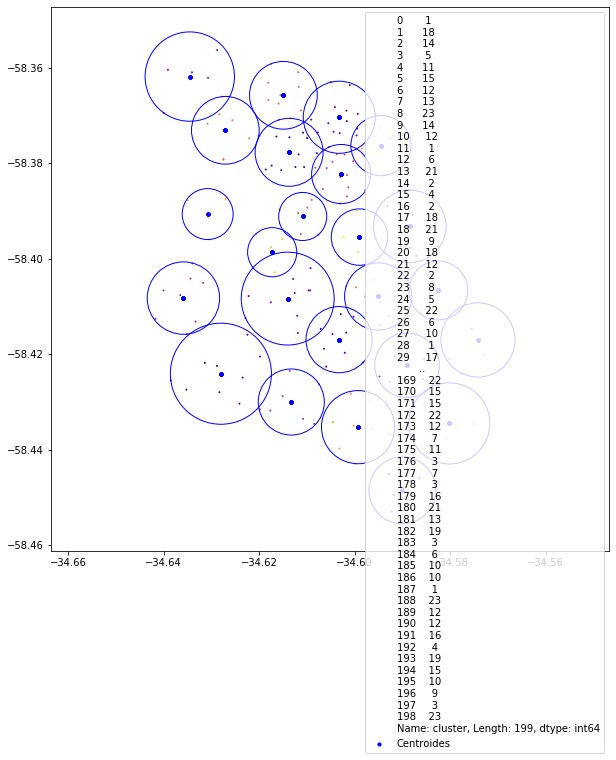

In [57]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(centroids_df['lat'], centroids_df['long'] , s = 1, c = centroids_df['cluster'],
            cmap=plt.get_cmap('plasma'), label=centroids_df['cluster'])
plt.scatter(centroids_df['lat_centroide'], centroids_df['long_centroide'] , s = 10, c = 'blue', label = 'Centroides')

for cluster in centroid_radius_df.values.tolist():
    art = mpatches.Circle((cluster[2], cluster[3]),cluster[1]
                          , edgecolor='b',fill=False)
    ax.add_patch(art)
    
ax.axis('equal')
plt.legend()
plt.show()

In [48]:
for i in centroid_radius_df.values.tolist():
    print(i)
    break

[0.0, 0.007009361082007936, -34.5899847, -58.44848987]
